Notes on using this notebook:
There is chunk file update before each ============= divider.
Which marks the ending of a cleaning task which alters working dataset.
Therefore, at initial opening of notebook import dependencies, run buildin function cells and, continue to work on task by reading chunks after dividers. 

In [4]:
#Import package pandas for data analysis
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
from numpy import int64
from numpy import float64
from numpy import datetime64
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
# Allows plots to appear directly in the notebook.
%matplotlib inline
# For dealing with some Accented characters (in Irish Place names)
import unidecode
# Date/time functionality
import datetime
import time
# Check if files exist
from os.path import exists
from os import makedirs
# System specific parameters and functions
import sys
# look at some z-scores for inspecting outliers.
from scipy import stats
import seaborn as sb
# lookup lat/long and convert lat/long to national grid references.
import geopy
import pyproj

from patsy import dmatrices
from sklearn import metrics

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
#from sklearn.tree import export_text

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

import graphviz
from graphviz import Source
#to read all CSV files in a folder
import os
import glob

Reading data in chunks and adding dataframes to a list
        
        *Note: Dont need to run below cell if chunks already created, call get_chunks function to create chunks list

In [ ]:
chunk_size = 10000000
batch_no=1
chunk_leavetimes_list=[]
for chunk in pd.read_csv('~/tmp/data/rt_leavetimes_DB_2018.txt',sep=';',chunksize=chunk_size):
    chunk_leavetimes_list.append(chunk)
    chunk.to_csv('Chunks/leavetimes/'+str(batch_no)+'chunk_leavetimes'+'.csv',index=False)
    batch_no+=1
    print(chunk.shape)

Reading Data from multiple files in a folder to a list of data frames 

In [5]:
def get_chunks(location):
    cwd=os.getcwd()
    path = cwd+location
    chunk_folder = glob.glob(os.path.join(path, "*.csv"))
    chunk_list=[]
    for filename in chunk_folder:
        # read the csv file
        df_chunk = pd.read_csv(filename)
        chunk_list.append(df_chunk)
        print('Location:', filename)
    return chunk_list

In [3]:
chunk_leavetimes_list=get_chunks('/Chunks/leavetimes')

('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/9chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/10chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/6chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/1chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/7chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/2chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/5chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/3chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/8chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/12chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/11chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/4chunk_leavet

Combining chunks to 1 big dataframe

In [4]:
df_leavetimes=pd.concat(chunk_leavetimes_list, axis=0)

In [5]:
df_leavetimes.shape

(116949113, 18)

In [7]:
df_leavetimes.head(5)

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,03-SEP-18 00:00:00,7656215,58,1125,76138,76138,76614,76614,2534826,NaN,NaN,NaN,NaN,NaN,NaN,11-SEP-18 10:03:32,NaN
1,DB,03-SEP-18 00:00:00,7656216,4,4886,79348,79348,79277,79277,2534826,NaN,NaN,NaN,NaN,NaN,NaN,11-SEP-18 10:03:32,NaN
2,DB,03-SEP-18 00:00:00,7656216,9,1153,79628,79628,79502,79502,2534826,NaN,NaN,NaN,NaN,NaN,NaN,11-SEP-18 10:03:32,NaN
3,DB,03-SEP-18 00:00:00,7656216,14,1158,79905,79905,79795,79806,2534826,NaN,NaN,NaN,NaN,NaN,NaN,11-SEP-18 10:03:32,NaN
4,DB,03-SEP-18 00:00:00,7656216,18,1162,80016,80016,79948,79948,2534826,NaN,NaN,NaN,NaN,NaN,NaN,11-SEP-18 10:03:32,NaN


In [8]:
df_leavetimes.tail(5)

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
9999995,DB,20-MAY-18 00:00:00,6768721,12,1017,61308,61308,61570,61585,2868400,NaN,NaN,NaN,NaN,NaN,NaN,13-JUN-18 18:30:25,NaN
9999996,DB,20-MAY-18 00:00:00,6778620,12,1017,59508,59508,59585,59585,2534795,NaN,NaN,NaN,NaN,NaN,NaN,13-JUN-18 18:30:25,NaN
9999997,DB,20-MAY-18 00:00:00,6772182,12,1017,57708,57708,57909,57921,1932331,NaN,NaN,NaN,NaN,NaN,NaN,13-JUN-18 18:30:25,NaN
9999998,DB,20-MAY-18 00:00:00,6770650,12,1017,63218,63218,63296,63309,2172288,NaN,NaN,NaN,NaN,NaN,NaN,13-JUN-18 18:30:25,NaN
9999999,DB,20-MAY-18 00:00:00,6770646,13,1018,48717,48717,48768,48768,2693212,NaN,NaN,NaN,NaN,NaN,NaN,13-JUN-18 18:30:25,NaN


In [9]:
for df in chunk_leavetimes_list:
    print(df.nunique())
    print ("="*66)

DATASOURCE             1
DAYOFSERVICE          34
TRIPID             64724
PROGRNUMBER          103
STOPPOINTID         4723
PLANNEDTIME_ARR    69009
PLANNEDTIME_DEP    69009
ACTUALTIME_ARR     72041
ACTUALTIME_DEP     72042
VEHICLEID           1003
PASSENGERS             0
PASSENGERSIN           0
PASSENGERSOUT          0
DISTANCE               0
SUPPRESSED             2
JUSTIFICATIONID     3395
LASTUPDATE            34
NOTE                   0
dtype: int64
DATASOURCE             1
DAYOFSERVICE          36
TRIPID             64778
PROGRNUMBER          103
STOPPOINTID         4736
PLANNEDTIME_ARR    69578
PLANNEDTIME_DEP    69578
ACTUALTIME_ARR     72185
ACTUALTIME_DEP     72167
VEHICLEID           1009
PASSENGERS             0
PASSENGERSIN           0
PASSENGERSOUT          0
DISTANCE               0
SUPPRESSED             2
JUSTIFICATIONID     3223
LASTUPDATE            36
NOTE                   0
dtype: int64
DATASOURCE             1
DAYOFSERVICE          34
TRIPID             86941

In [10]:
u_v_c_STOPPOINTID=[]
u_v_c_VEHICLEID=[]
for df in chunk_leavetimes_list:
    u_v_c_STOPPOINTID.append(df.STOPPOINTID.nunique())
    u_v_c_VEHICLEID.append(df.VEHICLEID.nunique())
print("Unique number of STOPPOINTID: ",max(u_v_c_STOPPOINTID))
print("Unique number of VEHICLEID: ",max(u_v_c_VEHICLEID))

('Unique number of STOPPOINTID: ', 4736)
('Unique number of VEHICLEID: ', 1019)


There is 4736 bus stop and data related to 1019 bus in this dataset.

In [13]:
u_v_c_TRIPID =[]
for df in chunk_leavetimes_list:
    u_v_c_TRIPID .append(df.TRIPID .nunique())
print("Unique number of TRIPID: ",sum(u_v_c_TRIPID ))

('Unique number of TRIPID: ', 826029)


In [14]:
for df in chunk_leavetimes_list:
    print(df.columns)

Index([u'DATASOURCE', u'DAYOFSERVICE', u'TRIPID', u'PROGRNUMBER',
       u'STOPPOINTID', u'PLANNEDTIME_ARR', u'PLANNEDTIME_DEP',
       u'ACTUALTIME_ARR', u'ACTUALTIME_DEP', u'VEHICLEID', u'PASSENGERS',
       u'PASSENGERSIN', u'PASSENGERSOUT', u'DISTANCE', u'SUPPRESSED',
       u'JUSTIFICATIONID', u'LASTUPDATE', u'NOTE'],
      dtype='object')
Index([u'DATASOURCE', u'DAYOFSERVICE', u'TRIPID', u'PROGRNUMBER',
       u'STOPPOINTID', u'PLANNEDTIME_ARR', u'PLANNEDTIME_DEP',
       u'ACTUALTIME_ARR', u'ACTUALTIME_DEP', u'VEHICLEID', u'PASSENGERS',
       u'PASSENGERSIN', u'PASSENGERSOUT', u'DISTANCE', u'SUPPRESSED',
       u'JUSTIFICATIONID', u'LASTUPDATE', u'NOTE'],
      dtype='object')
Index([u'DATASOURCE', u'DAYOFSERVICE', u'TRIPID', u'PROGRNUMBER',
       u'STOPPOINTID', u'PLANNEDTIME_ARR', u'PLANNEDTIME_DEP',
       u'ACTUALTIME_ARR', u'ACTUALTIME_DEP', u'VEHICLEID', u'PASSENGERS',
       u'PASSENGERSIN', u'PASSENGERSOUT', u'DISTANCE', u'SUPPRESSED',
       u'JUSTIFICATIONID', u'LAST

Dropping empty and constant columns from all chunks in dataset. 

In [15]:
for df in chunk_leavetimes_list:
    del df['DATASOURCE']
    del df['PASSENGERS']
    del df['PASSENGERSIN']
    del df['PASSENGERSOUT']
    del df['DISTANCE']
    del df['NOTE']

In [16]:
for df in chunk_leavetimes_list:
    print(df.columns)

Index([u'DAYOFSERVICE', u'TRIPID', u'PROGRNUMBER', u'STOPPOINTID',
       u'PLANNEDTIME_ARR', u'PLANNEDTIME_DEP', u'ACTUALTIME_ARR',
       u'ACTUALTIME_DEP', u'VEHICLEID', u'SUPPRESSED', u'JUSTIFICATIONID',
       u'LASTUPDATE'],
      dtype='object')
Index([u'DAYOFSERVICE', u'TRIPID', u'PROGRNUMBER', u'STOPPOINTID',
       u'PLANNEDTIME_ARR', u'PLANNEDTIME_DEP', u'ACTUALTIME_ARR',
       u'ACTUALTIME_DEP', u'VEHICLEID', u'SUPPRESSED', u'JUSTIFICATIONID',
       u'LASTUPDATE'],
      dtype='object')
Index([u'DAYOFSERVICE', u'TRIPID', u'PROGRNUMBER', u'STOPPOINTID',
       u'PLANNEDTIME_ARR', u'PLANNEDTIME_DEP', u'ACTUALTIME_ARR',
       u'ACTUALTIME_DEP', u'VEHICLEID', u'SUPPRESSED', u'JUSTIFICATIONID',
       u'LASTUPDATE'],
      dtype='object')
Index([u'DAYOFSERVICE', u'TRIPID', u'PROGRNUMBER', u'STOPPOINTID',
       u'PLANNEDTIME_ARR', u'PLANNEDTIME_DEP', u'ACTUALTIME_ARR',
       u'ACTUALTIME_DEP', u'VEHICLEID', u'SUPPRESSED', u'JUSTIFICATIONID',
       u'LASTUPDATE'],
      dtyp

In [17]:
# Clean the column names to remove white space after the name or in the name
for df in chunk_leavetimes_list:
    df.columns = df.columns.str.replace(' ', '')

Update chunkfiles with semi-cleaned versions

In [15]:
def update_csv_chunks(adress,name, c_list):
    cwd=os.getcwd()
    path = cwd+adress
    batch_no=1
    for chunk in c_list:
        chunk.to_csv(path+str(batch_no)+name+'.csv',index=False)
        batch_no+=1
        print(chunk.shape)

In [26]:
update_csv_chunks('/Chunks/leavetimes/','chunk_leavetimes', chunk_leavetimes_list)

(10000000, 12)
(10000000, 12)
(10000000, 12)
(10000000, 12)
(10000000, 12)
(10000000, 12)
(10000000, 12)
(10000000, 12)
(10000000, 12)
(6949113, 12)
(10000000, 12)
(10000000, 12)


#### ========================================================================================================

In [5]:
#uploading semicleaned chunk_list
chunk_leavetimes_list=get_chunks('/Chunks/leavetimes')

('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/9chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/10chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/6chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/1chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/7chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/2chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/5chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/3chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/8chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/12chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/11chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/4chunk_leavet

In [6]:
#updating bigdataframe with semicleaned chunks
df_leavetimes=pd.concat(chunk_leavetimes_list, axis=0)

In [7]:
df_leavetimes.dtypes

DAYOFSERVICE        object
TRIPID               int64
PROGRNUMBER          int64
STOPPOINTID          int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR       int64
ACTUALTIME_DEP       int64
VEHICLEID            int64
SUPPRESSED         float64
JUSTIFICATIONID    float64
LASTUPDATE          object
dtype: object

Create columns for arrival and departure time differences(not: unit of measurement for the difference is seconds)

In [8]:
for df in chunk_leavetimes_list:
    df['DIFFERENCETIME_ARR']=df['ACTUALTIME_ARR']-df['PLANNEDTIME_ARR']
    df['DIFFERENCETIME_DEP']=df['ACTUALTIME_DEP']-df['PLANNEDTIME_DEP']

In [9]:
#updating bigdataframe with newly derived features chunks
df_leavetimes=pd.concat(chunk_leavetimes_list, axis=0)

In [10]:
df_leavetimes.head(5)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,DIFFERENCETIME_ARR,DIFFERENCETIME_DEP
0,03-AUG-18 00:00:00,7329433,56,2967,28612,28612,28829,28829,1001239,NaN,NaN,18-AUG-18 18:21:22,217,217
1,03-AUG-18 00:00:00,7324687,56,2967,27412,27412,27417,27422,1932321,NaN,NaN,18-AUG-18 18:21:22,5,10
2,03-AUG-18 00:00:00,7318786,56,2967,31319,31319,31671,31679,1000955,NaN,NaN,18-AUG-18 18:21:22,352,360
3,03-AUG-18 00:00:00,7323098,56,2967,32519,32519,33204,33216,1000956,NaN,NaN,18-AUG-18 18:21:22,685,697
4,03-AUG-18 00:00:00,7317189,56,2967,35062,35062,36173,36173,1000115,NaN,NaN,18-AUG-18 18:21:22,1111,1111


In [11]:
#updating chunks with derived features
update_csv_chunks('/Chunks/leavetimes/','chunk_leavetimes', chunk_leavetimes_list)

(10000000, 14)
(6949113, 14)
(10000000, 14)
(10000000, 14)
(10000000, 14)
(10000000, 14)
(10000000, 14)
(10000000, 14)
(10000000, 14)
(10000000, 14)
(10000000, 14)
(10000000, 14)


#### ========================================================================================================

In [6]:
#uploading semicleaned chunk_list
chunk_leavetimes_list=get_chunks('/Chunks/leavetimes')

('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/9chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/10chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/6chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/1chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/7chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/2chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/5chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/3chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/8chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/12chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/11chunk_leavetimes.csv')
('Location:', '/home/team8/notebook/Pelin/Chunks/leavetimes/4chunk_leavet

Creating PK feature columns to merge with other DB datasets

In [11]:
for df in chunk_leavetimes_list:
    df['PK_4_TRIPS']=df['DAYOFSERVICE'].astype('str')+df['TRIPID'].astype('str')
    df['PK_4_VehICLES']=df['DAYOFSERVICE'].astype('str')+df['VEHICLEID'].astype('str')

In [12]:
#updating bigdataframe with newly derived features chunks
df_leavetimes=pd.concat(chunk_leavetimes_list, axis=0)

In [13]:
df_leavetimes.head(5)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,DIFFERENCETIME_ARR,DIFFERENCETIME_DEP,PK_4_TRIPS,PK_4_VehICLES
0,04-MAR-18 00:00:00,6370027,5,2311,32687,32687,32764,32764,2693263,NaN,NaN,12-MAR-18 10:26:59,77,77,04-MAR-18 00:00:006370027,04-MAR-18 00:00:002693263
1,04-MAR-18 00:00:00,6361858,5,2311,61680,61680,61764,61764,1932332,NaN,NaN,12-MAR-18 10:26:59,84,84,04-MAR-18 00:00:006361858,04-MAR-18 00:00:001932332
2,04-MAR-18 00:00:00,6361864,6,5025,77938,77938,77900,77900,1932332,NaN,NaN,12-MAR-18 10:26:59,-38,-38,04-MAR-18 00:00:006361864,04-MAR-18 00:00:001932332
3,04-MAR-18 00:00:00,6361866,6,5025,83338,83338,83418,83418,1932332,NaN,NaN,12-MAR-18 10:26:59,80,80,04-MAR-18 00:00:006361866,04-MAR-18 00:00:001932332
4,04-MAR-18 00:00:00,6366663,6,5025,85138,85138,85008,85008,1001058,NaN,NaN,12-MAR-18 10:26:59,-130,-130,04-MAR-18 00:00:006366663,04-MAR-18 00:00:001001058


In [16]:
#updating chunks with derived features
update_csv_chunks('/Chunks/leavetimes/','chunk_leavetimes', chunk_leavetimes_list)

(10000000, 16)
(10000000, 16)
(10000000, 16)
(10000000, 16)
(10000000, 16)
(6949113, 16)
(10000000, 16)
(10000000, 16)
(10000000, 16)
(10000000, 16)
(10000000, 16)
(10000000, 16)


#### ========================================================================================================

Converting features into appropriate data types

In [23]:
for df in chunk_leavetimes_list:
    df['DAYOFSERVICE']=df['DAYOFSERVICE'].astype('str')
    df['LASTUPDATE']=df['LASTUPDATE'].astype('str')

In [24]:
chunk_leavetimes_list[0].dtypes

DAYOFSERVICE           object
TRIPID                  int64
PROGRNUMBER             int64
STOPPOINTID             int64
PLANNEDTIME_ARR         int64
PLANNEDTIME_DEP         int64
ACTUALTIME_ARR          int64
ACTUALTIME_DEP          int64
VEHICLEID               int64
SUPPRESSED            float64
JUSTIFICATIONID       float64
LASTUPDATE             object
DIFFERENCETIME_ARR      int64
DIFFERENCETIME_DEP      int64
PK_4_TRIPS             object
PK_4_VehICLES          object
dtype: object

In [25]:
chunk_leavetimes_list[0].head(5)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,DIFFERENCETIME_ARR,DIFFERENCETIME_DEP,PK_4_TRIPS,PK_4_VehICLES
0,04-MAR-18 00:00:00,6370027,5,2311,32687,32687,32764,32764,2693263,NaN,NaN,12-MAR-18 10:26:59,77,77,04-MAR-18 00:00:006370027,04-MAR-18 00:00:002693263
1,04-MAR-18 00:00:00,6361858,5,2311,61680,61680,61764,61764,1932332,NaN,NaN,12-MAR-18 10:26:59,84,84,04-MAR-18 00:00:006361858,04-MAR-18 00:00:001932332
2,04-MAR-18 00:00:00,6361864,6,5025,77938,77938,77900,77900,1932332,NaN,NaN,12-MAR-18 10:26:59,-38,-38,04-MAR-18 00:00:006361864,04-MAR-18 00:00:001932332
3,04-MAR-18 00:00:00,6361866,6,5025,83338,83338,83418,83418,1932332,NaN,NaN,12-MAR-18 10:26:59,80,80,04-MAR-18 00:00:006361866,04-MAR-18 00:00:001932332
4,04-MAR-18 00:00:00,6366663,6,5025,85138,85138,85008,85008,1001058,NaN,NaN,12-MAR-18 10:26:59,-130,-130,04-MAR-18 00:00:006366663,04-MAR-18 00:00:001001058


In [28]:
def leavetimes_list_dtype_converter(df):
    df['DAYOFSERVICE'] =  pd.to_datetime(df['DAYOFSERVICE'], format="%d-%b-%y %H:%M:%S")
    df['TRIPID'] = df['TRIPID'].astype('category')
    df['STOPPOINTID']=df['STOPPOINTID'].astype('category')
    df['VEHICLEID']=df['VEHICLEID'].astype('category')
    df['SUPPRESSED']=df['SUPPRESSED'].astype('category')
    df['JUSTIFICATIONID']=df['JUSTIFICATIONID'].astype('category')
    df['LASTUPDATE'] =  pd.to_datetime(df['LASTUPDATE'], format="%d-%b-%y %H:%M:%S")
    print("\n")
    print(df.dtypes)
    return df

#### Descriptive statistics

In [29]:
chunk_leavetimes_list=map(leavetimes_list_dtype_converter,chunk_leavetimes_list)



DAYOFSERVICE          datetime64[ns]
TRIPID                      category
PROGRNUMBER                    int64
STOPPOINTID                 category
PLANNEDTIME_ARR                int64
PLANNEDTIME_DEP                int64
ACTUALTIME_ARR                 int64
ACTUALTIME_DEP                 int64
VEHICLEID                   category
SUPPRESSED                  category
JUSTIFICATIONID             category
LASTUPDATE            datetime64[ns]
DIFFERENCETIME_ARR             int64
DIFFERENCETIME_DEP             int64
PK_4_TRIPS                    object
PK_4_VehICLES                 object
dtype: object


DAYOFSERVICE          datetime64[ns]
TRIPID                      category
PROGRNUMBER                    int64
STOPPOINTID                 category
PLANNEDTIME_ARR                int64
PLANNEDTIME_DEP                int64
ACTUALTIME_ARR                 int64
ACTUALTIME_DEP                 int64
VEHICLEID                   category
SUPPRESSED                  category
JUSTIFICATIONID     

In [31]:
for df in chunk_leavetimes_list:
    # Descriptive stats for categorical features only.
    category_columns = df.select_dtypes(['category']).columns
    print("\n")
    print(df[category_columns].describe().T)



                      count   unique           top     freq
TRIPID           10000000.0  63128.0  6.389962e+06   1319.0
STOPPOINTID      10000000.0   4725.0  1.479000e+03  18287.0
VEHICLEID        10000000.0    989.0  2.693256e+06  17818.0
SUPPRESSED          37645.0      2.0  0.000000e+00  25293.0
JUSTIFICATIONID     37645.0   3037.0  4.849814e+17   1949.0


                      count   unique           top     freq
TRIPID           10000000.0  75647.0  6.637124e+06   1010.0
STOPPOINTID      10000000.0   4726.0  1.479000e+03  18064.0
VEHICLEID        10000000.0   1001.0  2.693284e+06  19395.0
SUPPRESSED          38342.0      2.0  0.000000e+00  28243.0
JUSTIFICATIONID     38342.0   2847.0  4.849814e+17    318.0


                      count   unique           top     freq
TRIPID           10000000.0  64778.0  8.028869e+06   1019.0
STOPPOINTID      10000000.0   4736.0  1.479000e+03  18818.0
VEHICLEID        10000000.0   1009.0  3.265718e+06  19139.0
SUPPRESSED          59596.0      2

In [32]:
for df in chunk_leavetimes_list:
    #Keep numaric columns.
    numeric_columns = df.select_dtypes(['int64']).columns
    #Descriptive stats for continious features only.
    print("\n")
    print(df[numeric_columns].describe().T)



                         count          mean           std      min      25%  \
PROGRNUMBER         10000000.0     31.127036     19.917698      1.0     15.0   
PLANNEDTIME_ARR     10000000.0  53588.964207  17426.062443  16200.0  38435.0   
PLANNEDTIME_DEP     10000000.0  53588.964207  17426.062443  16200.0  38435.0   
ACTUALTIME_ARR      10000000.0  53763.474484  17447.438765  16203.0  38579.0   
ACTUALTIME_DEP      10000000.0  53775.835340  17446.647657  16203.0  38591.0   
DIFFERENCETIME_ARR  10000000.0    174.510278    447.838490  -8447.0    -42.0   
DIFFERENCETIME_DEP  10000000.0    186.871133    450.137197  -8447.0    -32.0   

                        50%      75%      max  
PROGRNUMBER            29.0     45.0    103.0  
PLANNEDTIME_ARR     53796.0  67499.0  91141.0  
PLANNEDTIME_DEP     53796.0  67499.0  91141.0  
ACTUALTIME_ARR      54024.0  67731.0  94378.0  
ACTUALTIME_DEP      54037.0  67744.0  94378.0  
DIFFERENCETIME_ARR    104.0    348.0  12270.0  
DIFFERENCETIME_DEP   



                         count          mean           std      min      25%  \
PROGRNUMBER         10000000.0     31.149898     19.991980      1.0     15.0   
PLANNEDTIME_ARR     10000000.0  53331.144632  17516.848785  16200.0  38040.0   
PLANNEDTIME_DEP     10000000.0  53331.144632  17516.848785  16200.0  38040.0   
ACTUALTIME_ARR      10000000.0  53493.589884  17530.314808  16214.0  38169.0   
ACTUALTIME_DEP      10000000.0  53506.136532  17529.778551  16214.0  38180.0   
DIFFERENCETIME_ARR  10000000.0    162.445252    356.438627 -10713.0    -26.0   
DIFFERENCETIME_DEP  10000000.0    174.991899    358.470965 -10713.0    -16.0   

                        50%      75%      max  
PROGRNUMBER            29.0     45.0    103.0  
PLANNEDTIME_ARR     53348.0  67358.0  90994.0  
PLANNEDTIME_DEP     53348.0  67358.0  90994.0  
ACTUALTIME_ARR      53561.0  67574.0  92289.0  
ACTUALTIME_DEP      53576.0  67587.0  92289.0  
DIFFERENCETIME_ARR    101.0    304.0  15626.0  
DIFFERENCETIME_DEP   

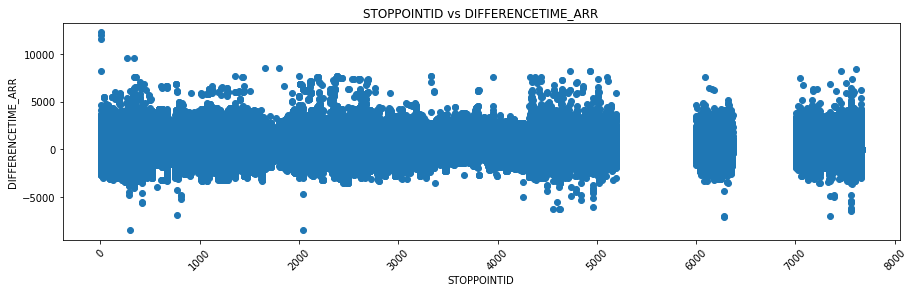

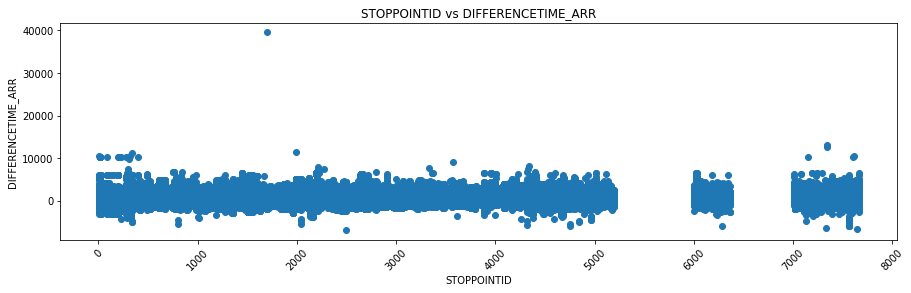

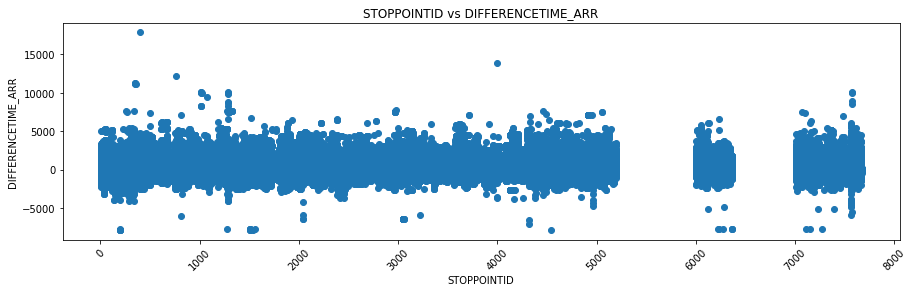

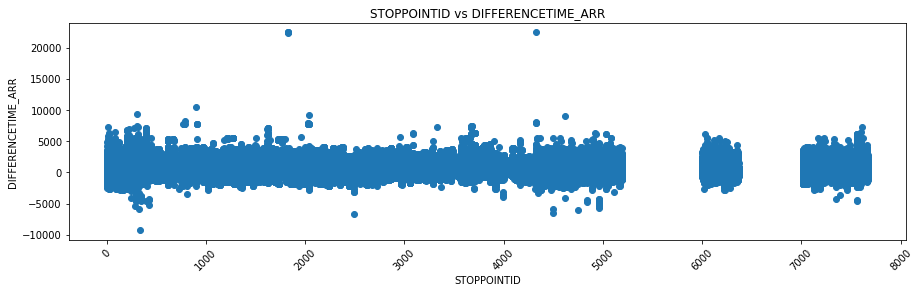

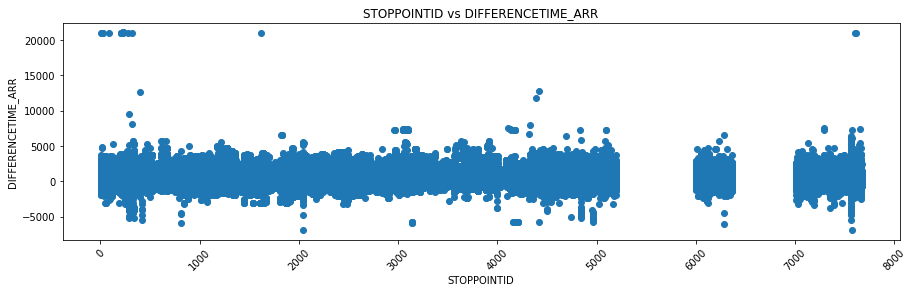

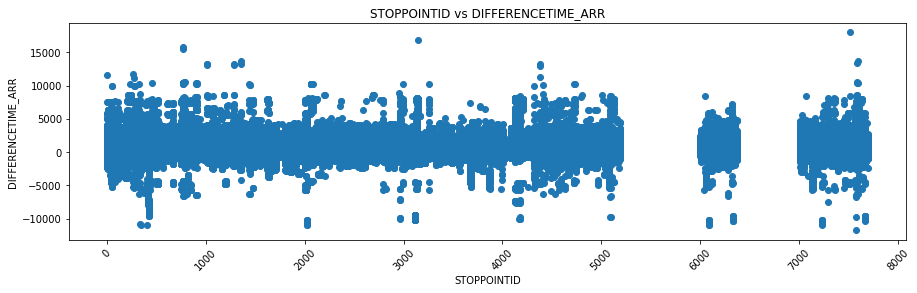

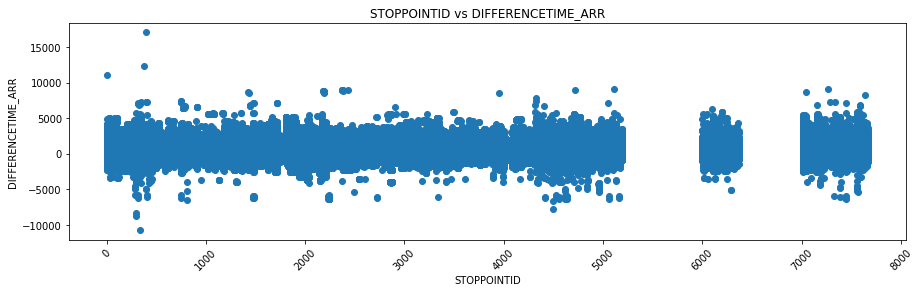

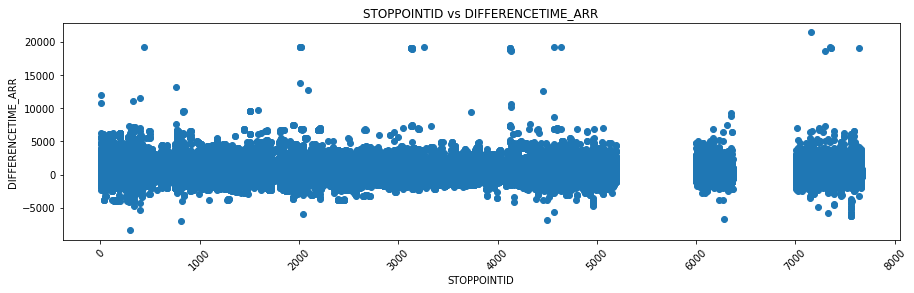

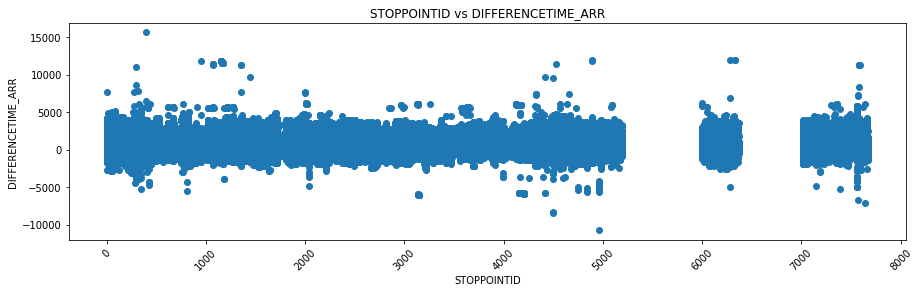

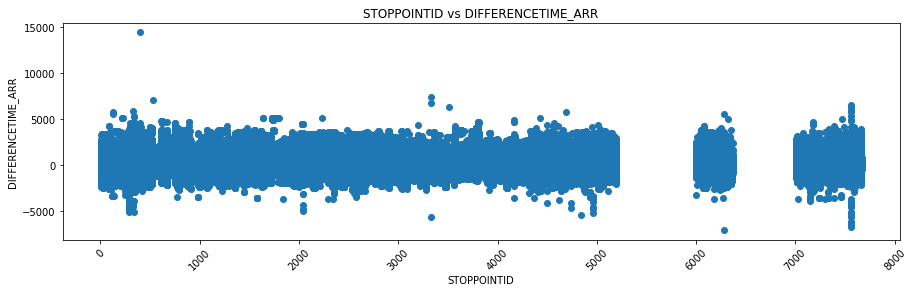

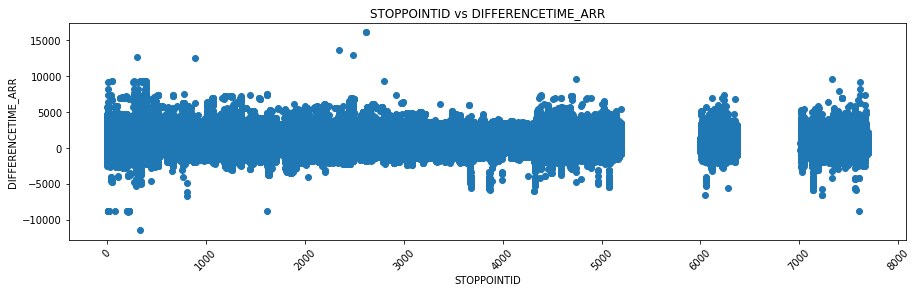

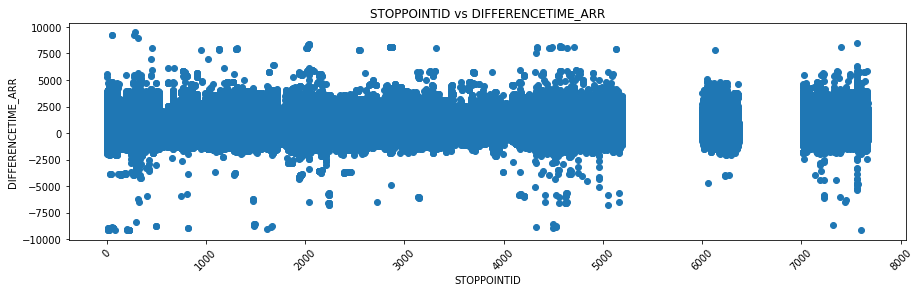

In [36]:
for df in chunk_leavetimes_list:
    y=df['DIFFERENCETIME_ARR']
    x=df['STOPPOINTID']
    plt.figure(figsize=(15,4))
    plt.title("STOPPOINTID vs DIFFERENCETIME_ARR")
    plt.scatter(x, y)
    plt.xticks(rotation=45)
    plt.xlabel("STOPPOINTID")
    plt.ylabel("DIFFERENCETIME_ARR")
    plt.show()